In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [149]:
df=pd.read_csv(r"CarPrice.csv")

In [150]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


1	Car_ID			:	Unique id of each observation (Interger)		
2	Symboling 		:		Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany		:		Name of car company (Categorical)		
4	fueltype		:		Car fuel type i.e gas or diesel (Categorical)		
5	aspiration		:		Aspiration used in a car (Categorical)		
6	doornumber		:		Number of doors in a car (Categorical)		
7	carbody			:	body of car (Categorical)		
8	drivewheel		:		type of drive wheel (Categorical)		
9	enginelocation	:			Location of car engine (Categorical)		
10	wheelbase		:		Weelbase of car (Numeric)		
11	carlength		:		Length of car (Numeric)		
12	carwidth		:		Width of car (Numeric)		
13	carheight		:		height of car (Numeric)		
14	curbweight		:		The weight of a car without occupants or baggage. (Numeric)		
15	enginetype		:		Type of engine. (Categorical)		
16	cylindernumber	:			cylinder placed in the car (Categorical)		
17	enginesize		:		Size of car (Numeric)		
18	fuelsystem		:		Fuel system of car (Categorical)		
19	boreratio		:		Boreratio of car (Numeric)	the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length	
20	stroke			:	Stroke or volume inside the engine (Numeric)		
21	compressionratio:				compression ratio of car (Numeric)		
22	horsepower		:		Horsepower (Numeric)		
23	peakrpm			:	car peak rpm (Numeric)		
24	citympg			:	Mileage in city (Numeric)		
25	highwaympg		:		Mileage on highway (Numeric)		
26	price(Dependent variable)	:			Price of car (Numeric)		

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [152]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

We can extract brand from the carname to make it mre useful.

In [153]:
brand=[]
for i in df['CarName']:
    k=i.split(" ")
    brand.append(k[0])

df.insert(3,"brand",brand)

In [154]:
df.shape

(205, 27)

In [155]:
o_dtype=[]
int_dtype=[]
float_dtype=[]
for i in list(df.columns)[:-1]:
    if np.dtype(df[i]) == 'O':
        o_dtype.append(i)
    elif np.dtype(df[i]) == 'int64':
        int_dtype.append(i)
    elif np.dtype(df[i]) == 'float64':
        float_dtype.append(i)
    continue

In [156]:
for _ in o_dtype[1:]:
    print("\nUnique values:\n",df[_].value_counts(),"\nMode: ",df[_].value_counts().index[0],end="\n\n")
    


Unique values:
 toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: brand, dtype: int64 
Mode:  toyota


Unique values:
 gas       185
diesel     20
Name: fueltype, dtype: int64 
Mode:  gas


Unique values:
 std      168
turbo     37
Name: aspiration, dtype: int64 
Mode:  std


Unique values:
 four    115
two      90
Name: doornumber, dtype: int64 
Mode:  four


Unique values:
 sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 
Mode:  sedan


Unique values:
 fwd    120

1. All these variables need to be converted to dummy variables to be encoded
2. the variable "brand" needs to be cleaned, it has some misspelled values.

In [157]:
corrector_brand={'vw':'volkswagen','vokswagen':'volkswagen','maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota'}

In [158]:
df['brand']=df['brand'].replace(corrector_brand)

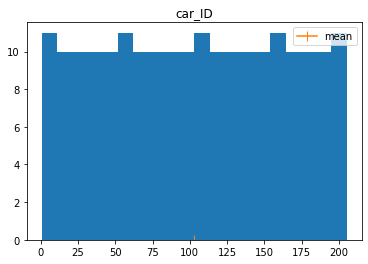

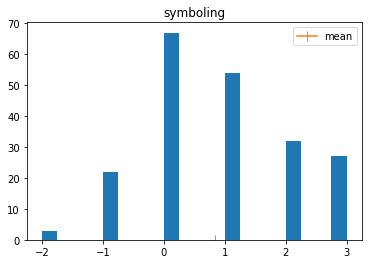

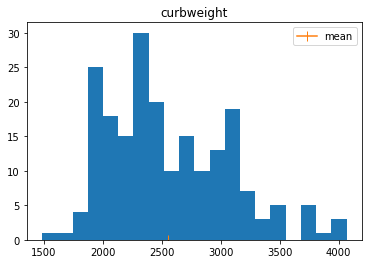

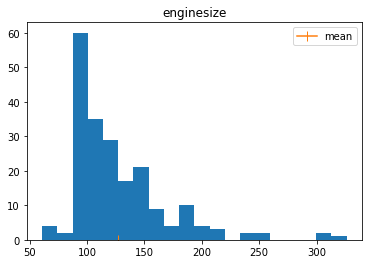

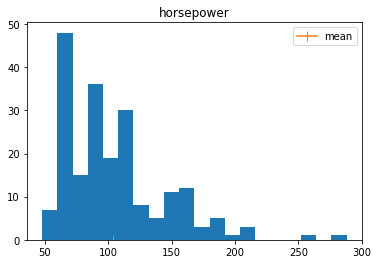

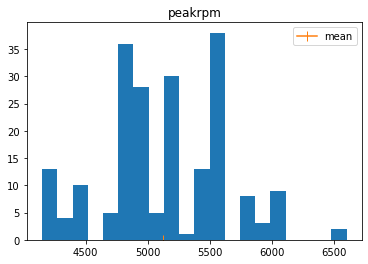

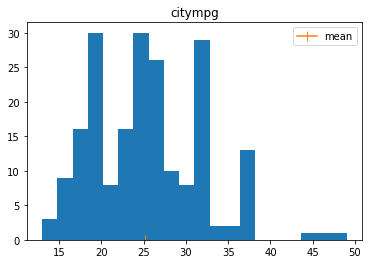

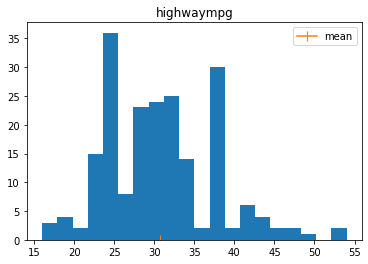

In [159]:
for _ in int_dtype:
    mean=np.mean(df[_])
    plt.title(_)
    plt.hist(df[_],bins=20)
    plt.plot(mean,0,marker='|',markerfacecolor='red',markersize='10')
    plt.legend(['mean'])
    plt.show()

In [160]:
float_dtype

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio']

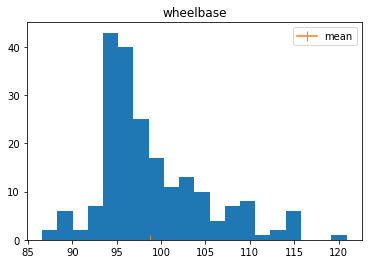

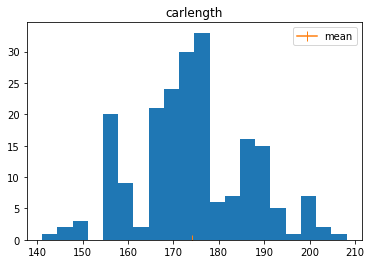

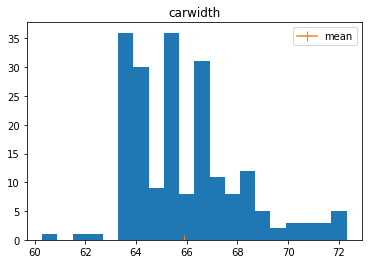

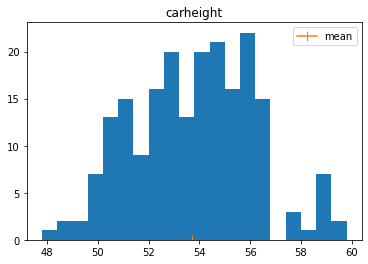

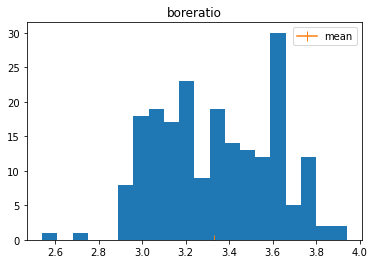

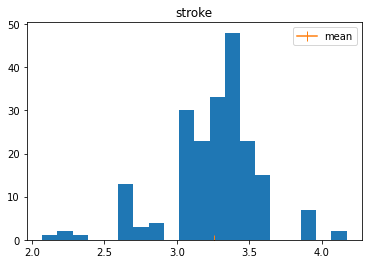

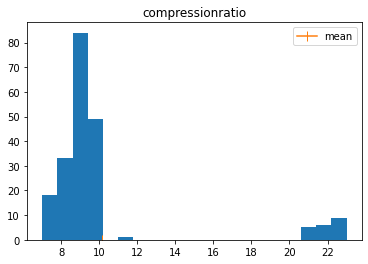

In [161]:
for _ in float_dtype:
    mean=np.mean(df[_])
    plt.title(_)
    plt.hist(df[_],bins=20)
    plt.plot(mean,0,marker='|',markerfacecolor='red',markersize='10')
    plt.legend(['mean'])
    plt.show()

all the variables of type int and float need to be standardised so as to fit in the regression model.

In [162]:
corr=df.corr()

<AxesSubplot:>

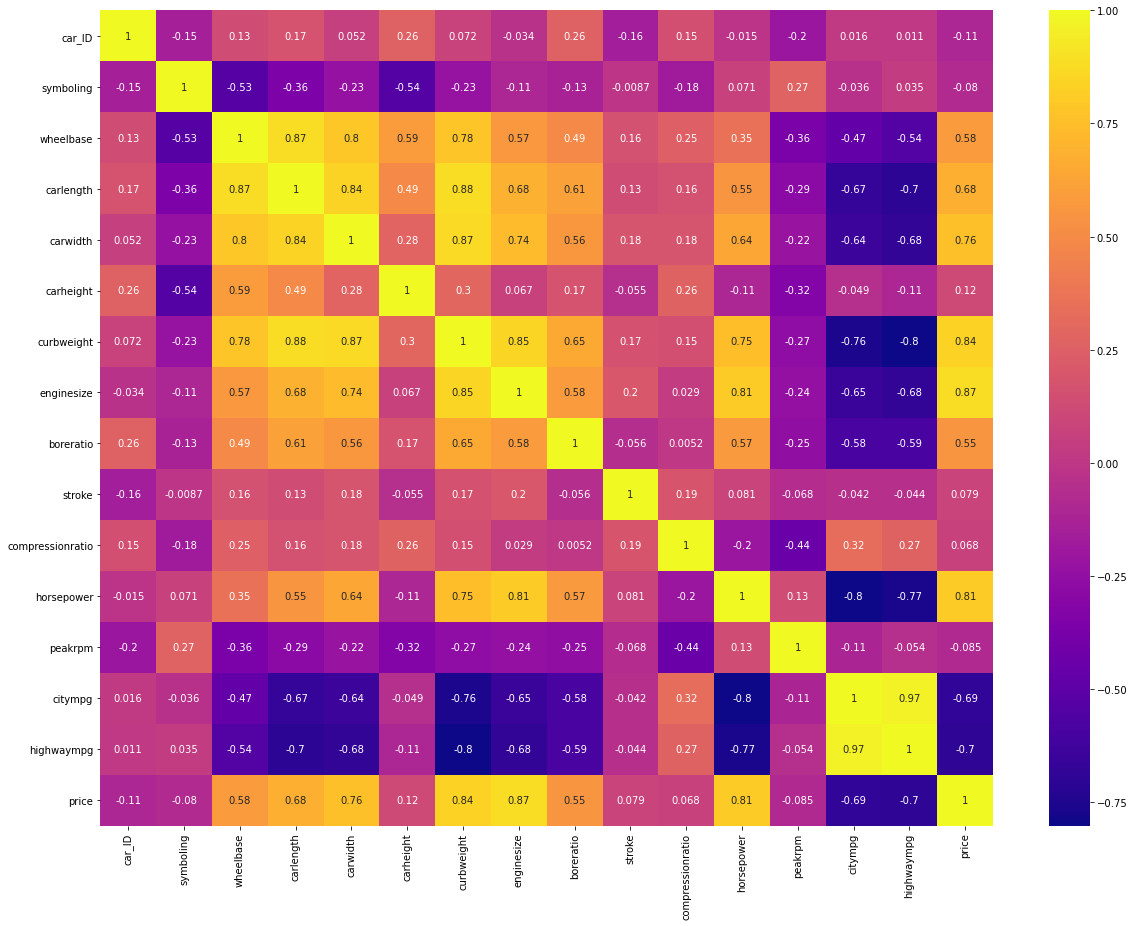

In [163]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,cmap='plasma',annot=True)

1. wheel base and car height is inversely related to symboling
2. carlength carwidth and curbweight are positively correlated to wheel base but highway mpg is negatively correlated.
3. carlenght has a strong correation with carwidth and curbweight and has a negative correlation with highway mpg and city mpg
4. engne size and horse power are positively correlated as they should be.
5. as engine size and horse power increases, the mileage of the cr decreases.
6. increase in horse power sow increase in weight as the engine size increases.
7. as the price increases carlength, width weight engine size and horse power increases but the mileage decreases.

<AxesSubplot:xlabel='price', ylabel='Density'>

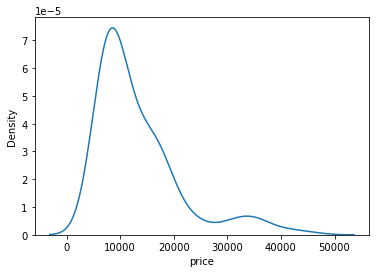

In [17]:

sns.kdeplot(df['price'])

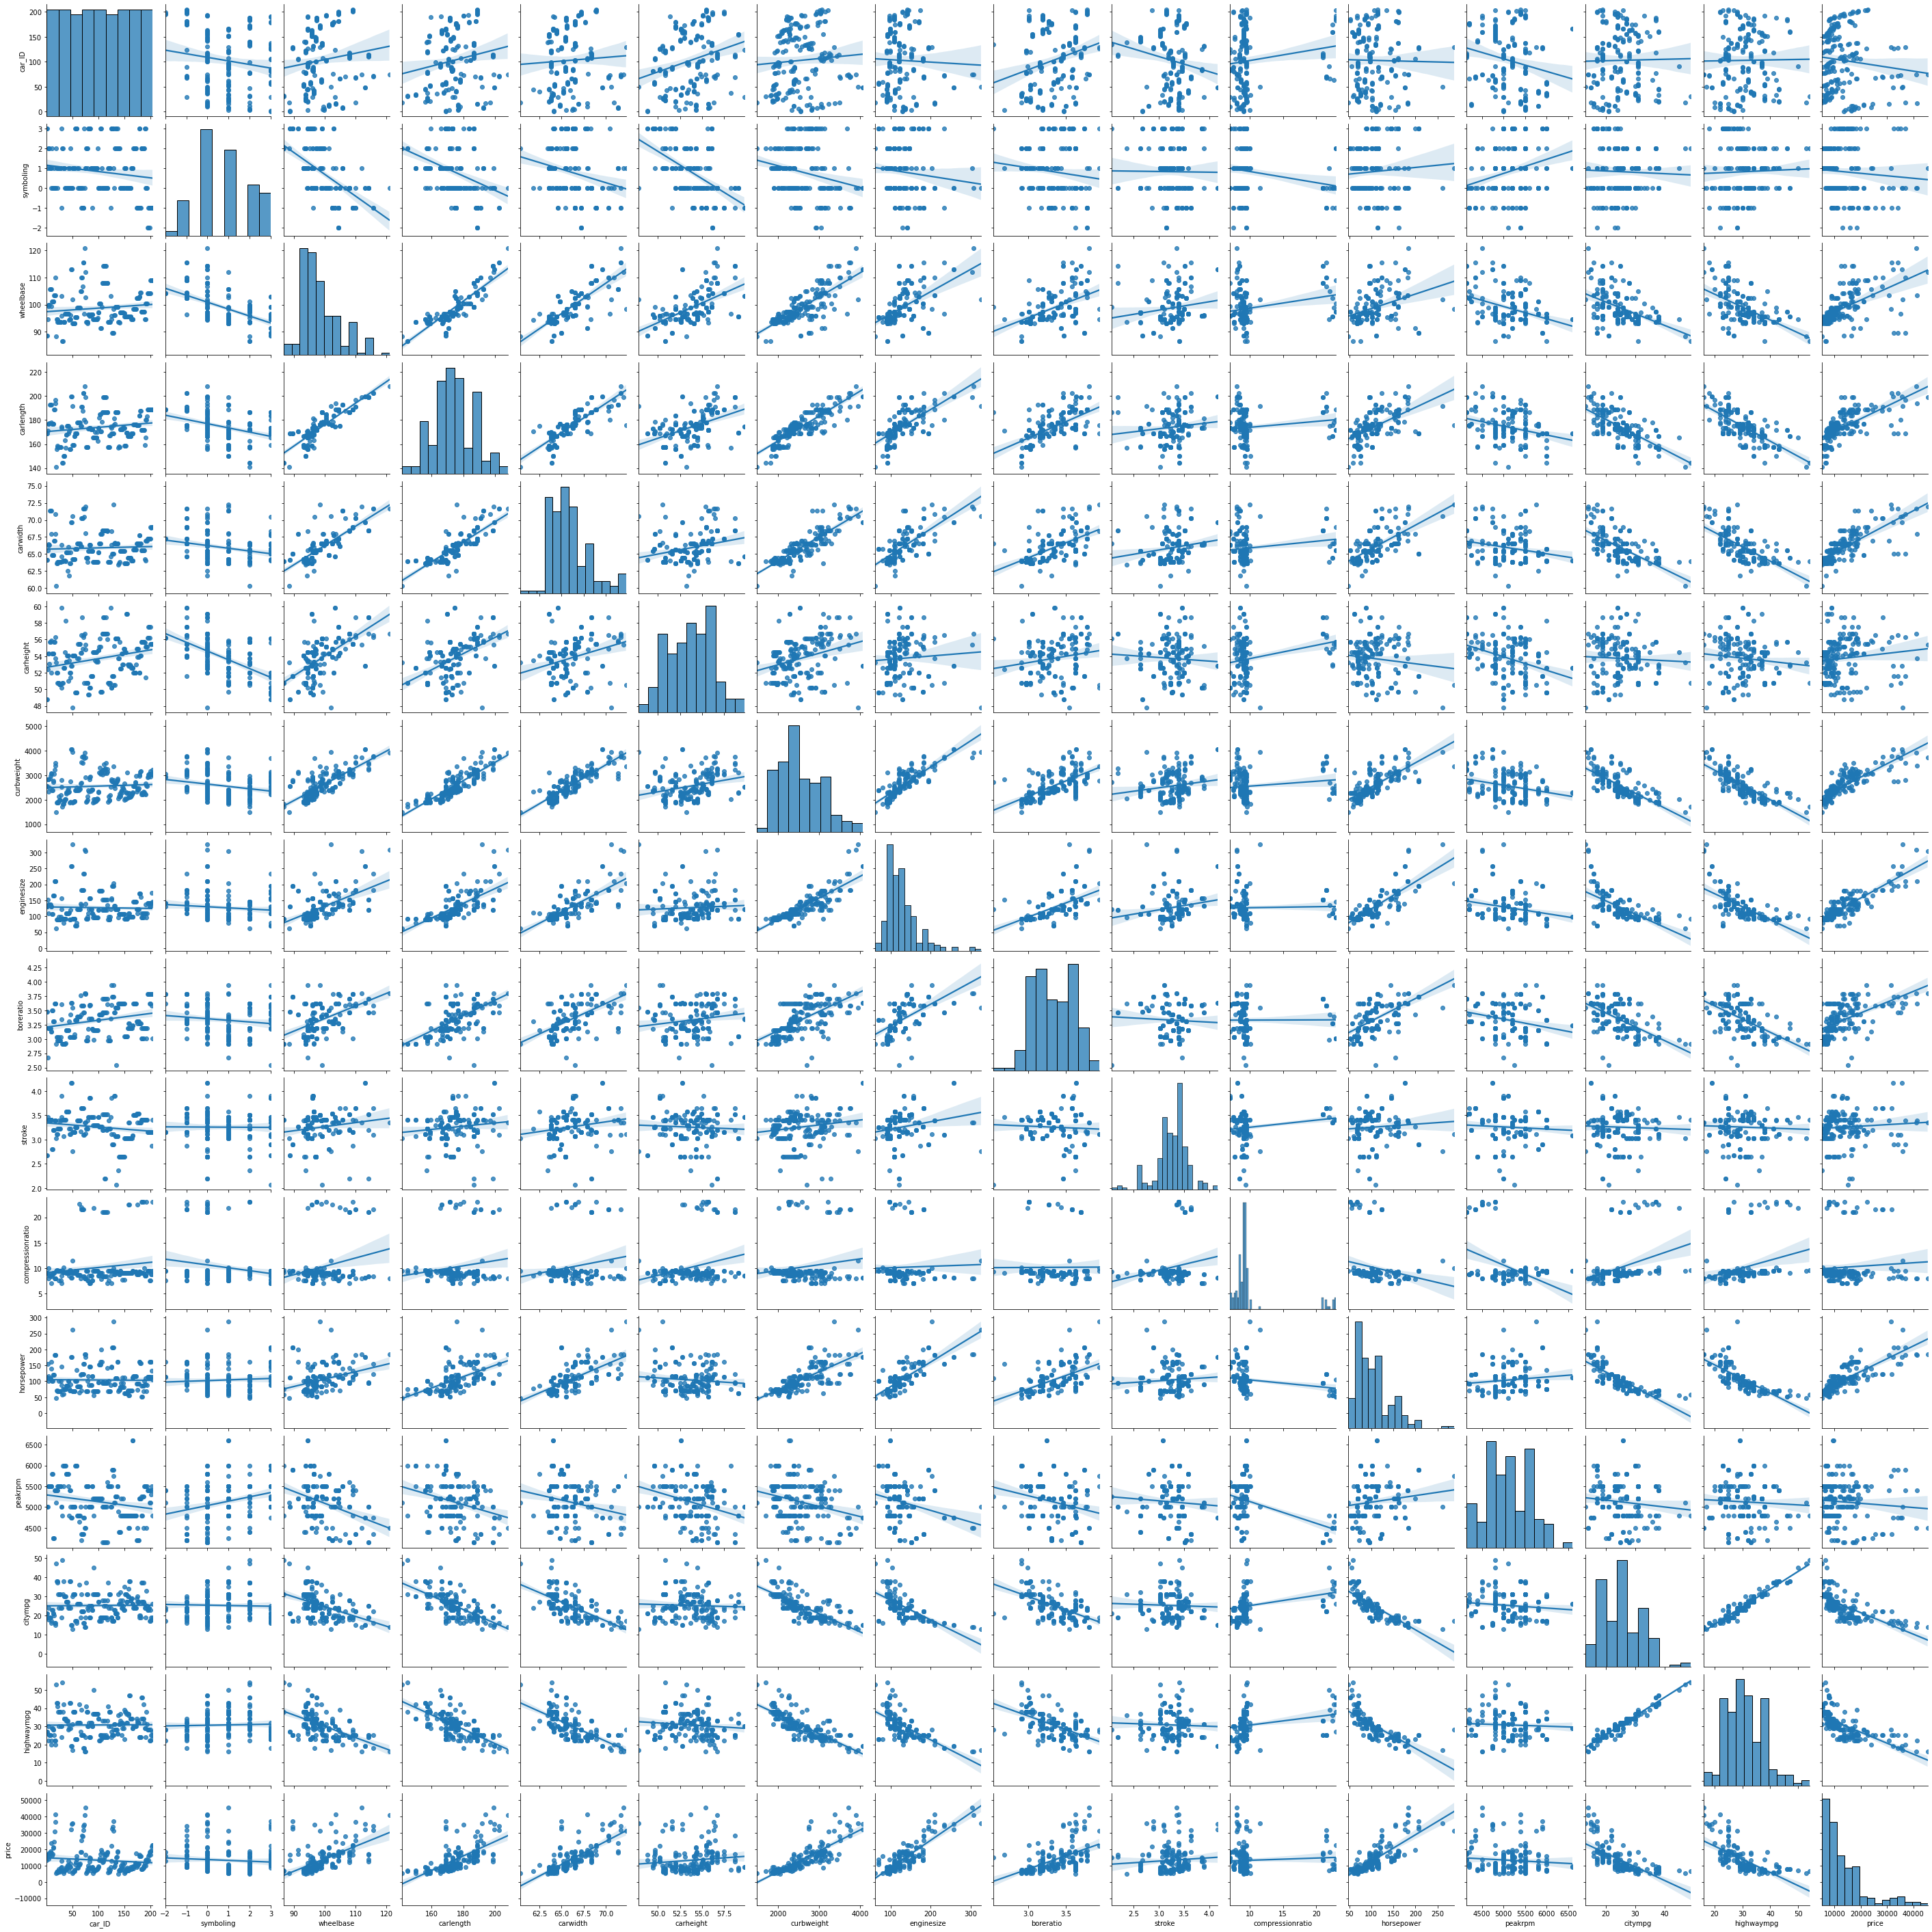

In [94]:
sns.pairplot(df,kind='reg')

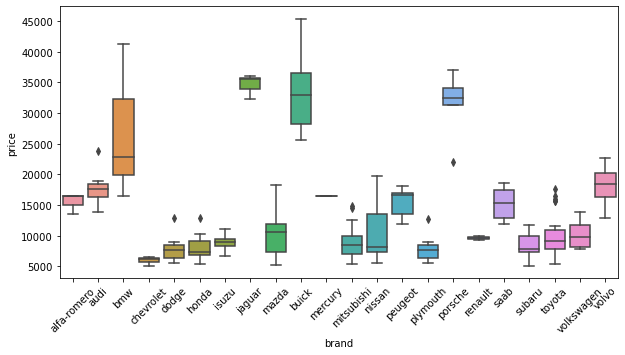

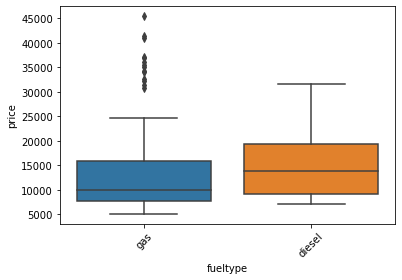

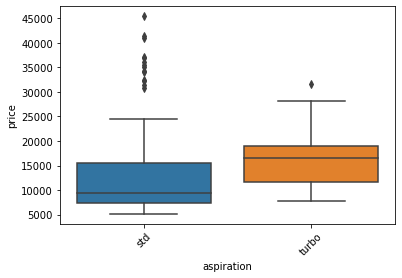

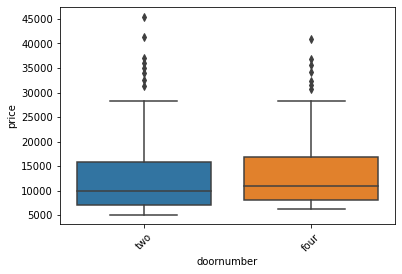

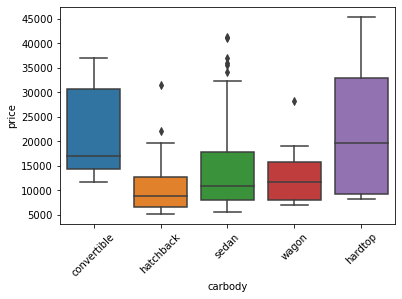

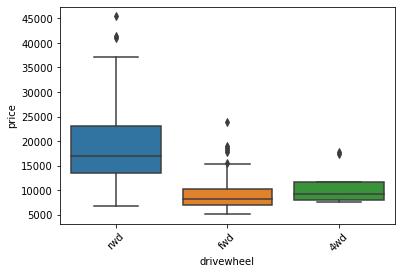

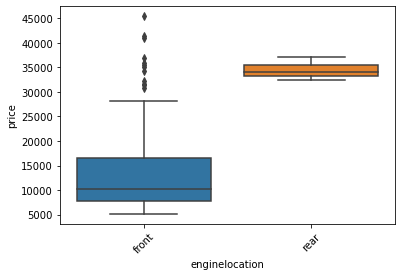

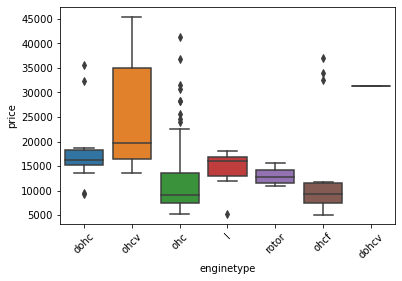

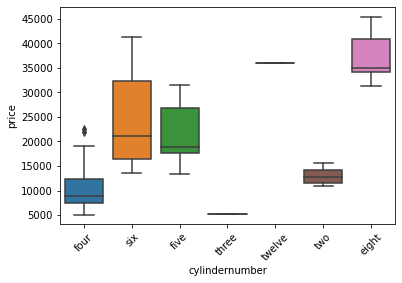

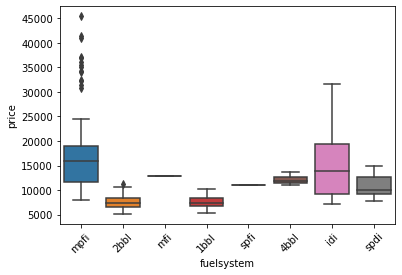

In [164]:
plt.figure(figsize=(10,5))
for _ in o_dtype[1:]:
    sns.boxplot(data=df,y='price',x=_)
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=45)
    plt.show()

<AxesSubplot:xlabel='symboling', ylabel='price'>

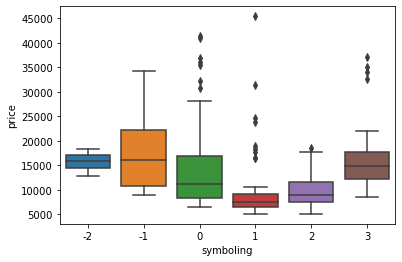

In [95]:
sns.boxplot(data=df,x='symboling',y="price")

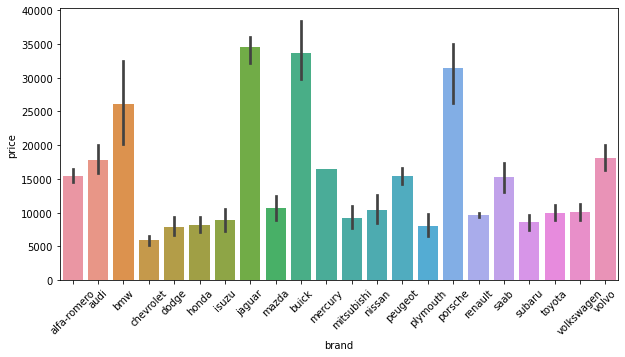

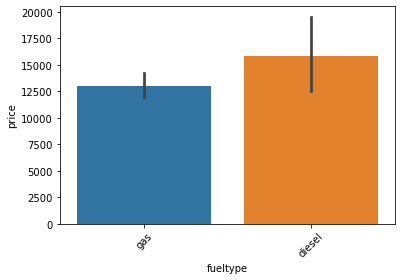

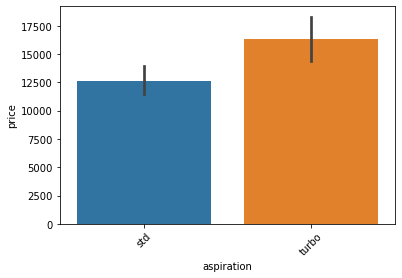

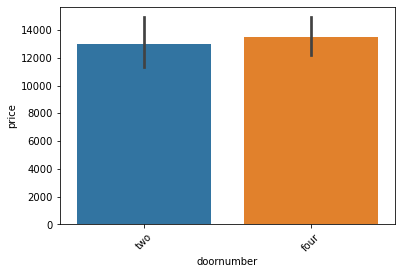

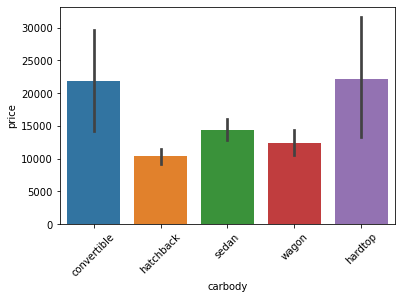

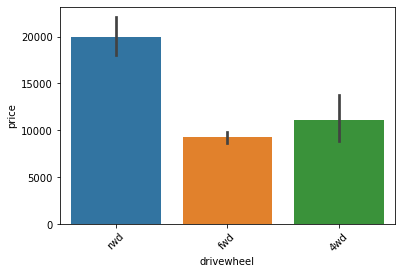

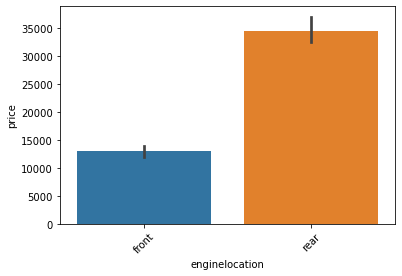

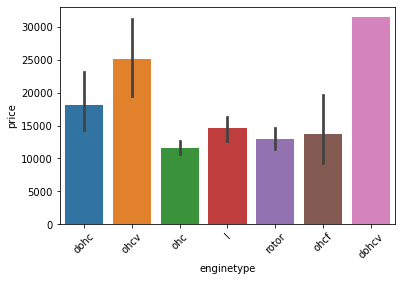

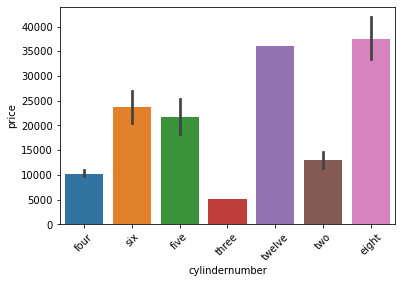

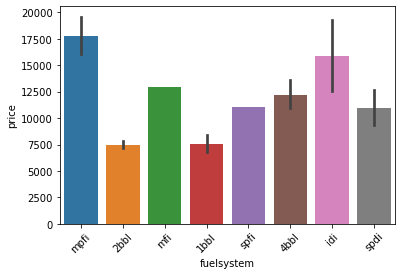

In [165]:
plt.figure(figsize=(10,5))
for _ in o_dtype[1:]:
    sns.barplot(data=df,y='price',x=_)
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=45)
    plt.show()

In [178]:
for _ in o_dtype[1:]:
    thresh=0
    mapper={}
    for i in list(df[_].unique()):
        mapper[i]=thresh
        thresh+=1
    df[_]=df[_].map(mapper)
    

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   brand             205 non-null    int64  
 4   fueltype          205 non-null    int64  
 5   aspiration        205 non-null    int64  
 6   doornumber        205 non-null    int64  
 7   carbody           205 non-null    int64  
 8   drivewheel        205 non-null    int64  
 9   enginelocation    205 non-null    int64  
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    int64  
 16  cylindernumber    205 non-null    int64  
 1

In [180]:
df.describe()

,car_ID,symboling,brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,12.195122,0.097561,0.180488,0.560976,1.80000,0.673171,0.014634,98.756585,...,126.907317,1.478049,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.274831,0.297446,0.385535,0.497483,0.83666,0.556171,0.120377,6.021776,...,41.642693,2.184113,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,94.500000,...,97.000000,0.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,12.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,97.000000,...,120.000000,1.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,19.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,102.400000,...,141.000000,1.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,21.000000,1.000000,1.000000,1.000000,4.00000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [118]:
X,y=df.drop(['car_ID','CarName'],axis=1).iloc[:,:-1],df.iloc[:,-1]

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [121]:
X_train

,symboling,brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
125,3,15,0,0,1,1,1,0,94.5,168.9,...,0,151,0,3.94,3.11,9.5,143,5500,19,27
42,1,4,0,0,1,0,0,0,96.5,169.1,...,0,110,1,3.15,3.58,9.1,100,5500,25,31
156,0,0,0,0,0,0,0,0,95.7,166.3,...,0,98,1,3.19,3.03,9.0,70,4800,30,37
136,3,14,0,1,1,1,0,0,99.1,186.6,...,0,121,0,3.54,3.07,9.0,160,5500,19,26
140,2,6,0,0,1,1,2,0,93.3,157.3,...,0,108,1,3.62,2.64,8.7,73,4400,26,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,1,0,0,1,1,1,0,99.2,178.5,...,1,181,0,3.43,3.27,9.0,160,5200,19,25
14,1,11,0,0,0,0,1,0,103.5,189.0,...,1,164,0,3.31,3.19,9.0,121,4250,20,25
92,1,1,0,0,0,0,0,0,94.5,165.3,...,0,97,1,3.15,3.29,9.4,69,5200,31,37
179,3,0,0,0,1,1,1,0,102.9,183.5,...,1,171,0,3.27,3.35,9.3,161,5200,19,24


In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scalar=StandardScaler()

In [124]:
scaled_Xtrain=scalar.fit_transform(X_train)

In [125]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(scaled_Xtrain,y_train)

LinearRegression()

In [126]:
scaled_Xtest=scalar.transform(X_test)

y_pred=LR.predict(scaled_Xtest)

In [127]:
from sklearn.metrics import r2_score,mean_squared_error


r2_score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print("R2 Score: ",r2_score)

print("RMSE: ",np.sqrt(mse))

R2 Score:  0.8682930866112105
RMSE:  2935.689235824032


In [128]:
# def correlation(data,threshold):
#     correlated_cols=set()
#     corr_matrix=data.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j])>threshold:
#                 colname=corr_matrix.columns[i]
#                 correlated_cols.add(colname)
#     return correlated_cols

In [175]:
for _ in o_dtype[1:]:
    thresh=0
    mapper={}
    for i in list(df[_].unique()):
        mapper[i]=thresh
        thresh+=1
#     df[_]=df[_].map(mapper)
    print(_,mapper)

brand {'alfa-romero': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'honda': 5, 'isuzu': 6, 'jaguar': 7, 'mazda': 8, 'buick': 9, 'mercury': 10, 'mitsubishi': 11, 'nissan': 12, 'peugeot': 13, 'plymouth': 14, 'porsche': 15, 'renault': 16, 'saab': 17, 'subaru': 18, 'toyota': 19, 'volkswagen': 20, 'volvo': 21}
fueltype {'gas': 0, 'diesel': 1}
aspiration {'std': 0, 'turbo': 1}
doornumber {'two': 0, 'four': 1}
carbody {'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4}
drivewheel {'rwd': 0, 'fwd': 1, '4wd': 2}
enginelocation {'front': 0, 'rear': 1}
enginetype {'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6}
cylindernumber {'four': 0, 'six': 1, 'five': 2, 'three': 3, 'twelve': 4, 'two': 5, 'eight': 6}
fuelsystem {'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7}


In [174]:
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.